In [2]:
#Import 
from sklearn.neural_network  import MLPRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics         import r2_score
from IPython.display import clear_output
import matplotlib.pyplot as plt
from time import time
from matplotlib.ticker import AutoMinorLocator
import os
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

#Read data
data = pd.read_csv("diabetes_binary_5050split_health_indicators.csv")
display(data.head())

y = data.iloc[:,0]
x = data.iloc[:,1:]

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GeneralHealth,MentalHealth,PhysicalHealth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [3]:
###Data pipeline

##---Normalize data---
#Normalize BMI
x2 = x.copy()
x2.loc[:,"BMI"] = x.loc[:,"BMI"] / x.loc[:,"BMI"].max()

#Normalize MentalHealth
x3 = x2.copy()
x3.loc[:,"MentalHealth"] = x2.loc[:,"MentalHealth"] / x2.loc[:,"MentalHealth"].max()

#Normalize PhysicalHealth
x4 = x3.copy()
x4.loc[:,"PhysicalHealth"] = x3.loc[:,"PhysicalHealth"] / x3.loc[:,"PhysicalHealth"].max()

##---Split into binary groups---
#General health group
for i in range(x4["GeneralHealth"].max()):
    x4["GenHlthGrp" + str(i+1)] = 0
for i in range(len(x4)):
    x4.loc[i,"GenHlthGrp" + str(x4.loc[i,"GeneralHealth"])] = 1
x4.pop("GeneralHealth")

#Age group
for i in range(x4["Age"].max()):
    x4["AgeGrp" + str(i+1)] = 0
for i in range(len(x4)):
    x4.loc[i,"AgeGrp" + str(x4.loc[i,"Age"])] = 1
x4.pop("Age")

#Education group
for i in range(x4["Education"].max()):
    x4["EducationGrp" + str(i+1)] = 0
for i in range(len(x4)):
    x4.loc[i,"EducationGrp" + str(x4.loc[i,"Education"])] = 1
x4.pop("Education")

#Income group
for i in range(x4["Income"].max()):
    x4["IncomeGrp" + str(i+1)] = 0
for i in range(len(x4)):
    x4.loc[i,"IncomeGrp" + str(x4.loc[i,"Income"])] = 1
x4.pop("Income")

0        8
1        8
2        8
3        8
4        8
        ..
70687    1
70688    6
70689    4
70690    4
70691    2
Name: Income, Length: 70692, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x4, y, test_size = 0.2, random_state = 1)

In [8]:
param_range1 = np.linspace(1000, 10000, 10)
train_scores1, test_scores1 = validation_curve(LinearSVC(), 
                                              X_train, y_train, 
                                              param_name  = "max_iter", 
                                              param_range = param_range1,
                                              cv          = 5)

train_scores_mean1 = np.mean(train_scores1, axis=1)
train_scores_std1  = np.std(train_scores1, axis=1)
test_scores_mean1  = np.mean(test_scores1, axis=1)
test_scores_std1   = np.std(test_scores1, axis=1)

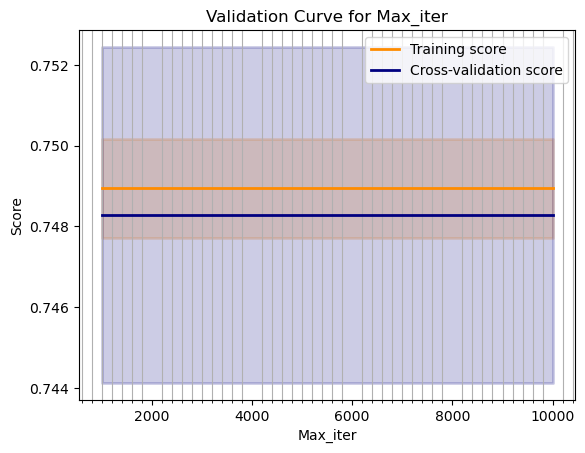

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
plt.title("Validation Curve for Max_iter")
plt.xlabel(r"Max_iter")
plt.ylabel("Score")
lw = 2
plt.plot(
    param_range1, train_scores_mean1, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range1,
    train_scores_mean1 - train_scores_std1,
    train_scores_mean1 + train_scores_std1,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range1, test_scores_mean1, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range1,
    test_scores_mean1 - test_scores_std1,
    test_scores_mean1 + test_scores_std1,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(b=True, which='minor')
plt.show()

plt.savefig('max_iter_validation_curve.png')

In [10]:
param_range2 = [1e-4,1e-5,1e-6,1e-7]
train_scores2, test_scores2 = validation_curve(LinearSVC(), 
                                              X_train, y_train, 
                                              param_name  = "tol", 
                                              param_range = param_range2,
                                              cv          = 5)

train_scores_mean2 = np.mean(train_scores2, axis=1)
train_scores_std2= np.std(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)

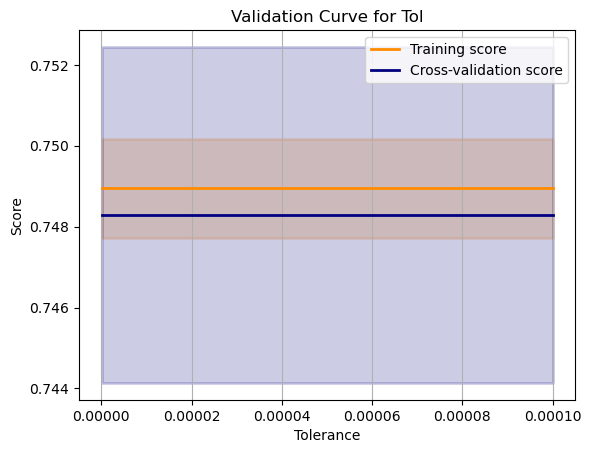

<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure()
plt.title("Validation Curve for Tol")
plt.xlabel(r"Tolerance")
plt.ylabel("Score")
lw = 2
plt.plot(
    param_range2, train_scores_mean2, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range2,
    train_scores_mean2 - train_scores_std2,
    train_scores_mean2 + train_scores_std2,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range2, test_scores_mean2, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range2,
    test_scores_mean2 - test_scores_std2,
    test_scores_mean2 + test_scores_std2,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.grid(axis = 'x')
plt.show()

plt.savefig('tol_validation_curve.png')

In [83]:
param_range3 = np.linspace(1, 10, 91)
train_scores3, test_scores3 = validation_curve(LinearSVC(), 
                                              X_train, y_train, 
                                              param_name  = "C", 
                                              param_range = param_range3,
                                              cv          = 5)

train_scores_mean3 = np.mean(train_scores3, axis=1)
train_scores_std3 = np.std(train_scores3, axis=1)
test_scores_mean3 = np.mean(test_scores3, axis=1)
test_scores_std3 = np.std(test_scores3, axis=1)

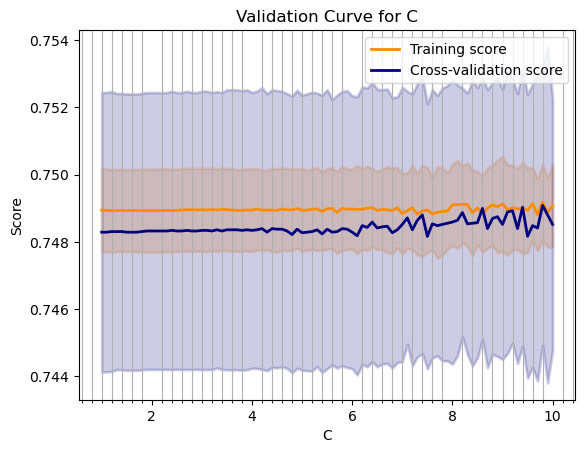

<Figure size 640x480 with 0 Axes>

In [90]:
fig, ax = plt.subplots()
plt.title("Validation Curve for C")
plt.xlabel(r"C")
plt.ylabel("Score")
lw = 2
plt.plot(
    param_range3, train_scores_mean3, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range3,
    train_scores_mean3 - train_scores_std3,
    train_scores_mean3 + train_scores_std3,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range3, test_scores_mean3, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range3,
    test_scores_mean3 - test_scores_std3,
    test_scores_mean3 + test_scores_std3,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(b=True, which='minor')
plt.show()

plt.savefig('C_validation_curve')